In [35]:
#%pip install pandas
%pip install matplotlib
%pip install folium geopandas pandas


Note: you may need to restart the kernel to use updated packages.
   ---------------------------------------- 0.0/16.2 MB ? eta -:--:--
   ----- ---------------------------------- 2.4/16.2 MB 12.2 MB/s eta 0:00:02
   ----------- ---------------------------- 4.7/16.2 MB 11.9 MB/s eta 0:00:01
   --------------- ------------------------ 6.3/16.2 MB 10.4 MB/s eta 0:00:01
   -------------------- ------------------- 8.4/16.2 MB 10.8 MB/s eta 0:00:01
   ----------------------- ---------------- 9.4/16.2 MB 9.6 MB/s eta 0:00:01
   ---------------------------- ----------- 11.5/16.2 MB 9.5 MB/s eta 0:00:01
   ---------------------------------- ----- 13.9/16.2 MB 9.8 MB/s eta 0:00:01
   ---------------------------------------  16.0/16.2 MB 10.1 MB/s eta 0:00:01
   ---------------------------------------- 16.2/16.2 MB 9.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/6.3 MB ? eta -:--:--
   ---------- ----------------------------- 1.6/6.3 MB 7.6 MB/s eta 0:00:01
   --------------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import folium

In [16]:
df=pd.read_csv("../Transform_movimientos/Movimiento_Distrito.csv")

In [6]:
df.head()

,Código,Departamento,Provincia,Distrito,Aún no había nacido,"Sí, vivía hace 5 años en este distrito",No vivía hace 5 años en este distrito
0,10101,Amazonas,Chachapoyas,Chachapoyas,2633,22774,7182
1,10102,Amazonas,Chachapoyas,Asunción,22,220,20
2,10103,Amazonas,Chachapoyas,Balsas,111,938,87
3,10104,Amazonas,Chachapoyas,Cheto,44,533,65
4,10105,Amazonas,Chachapoyas,Chiliquin,49,483,53


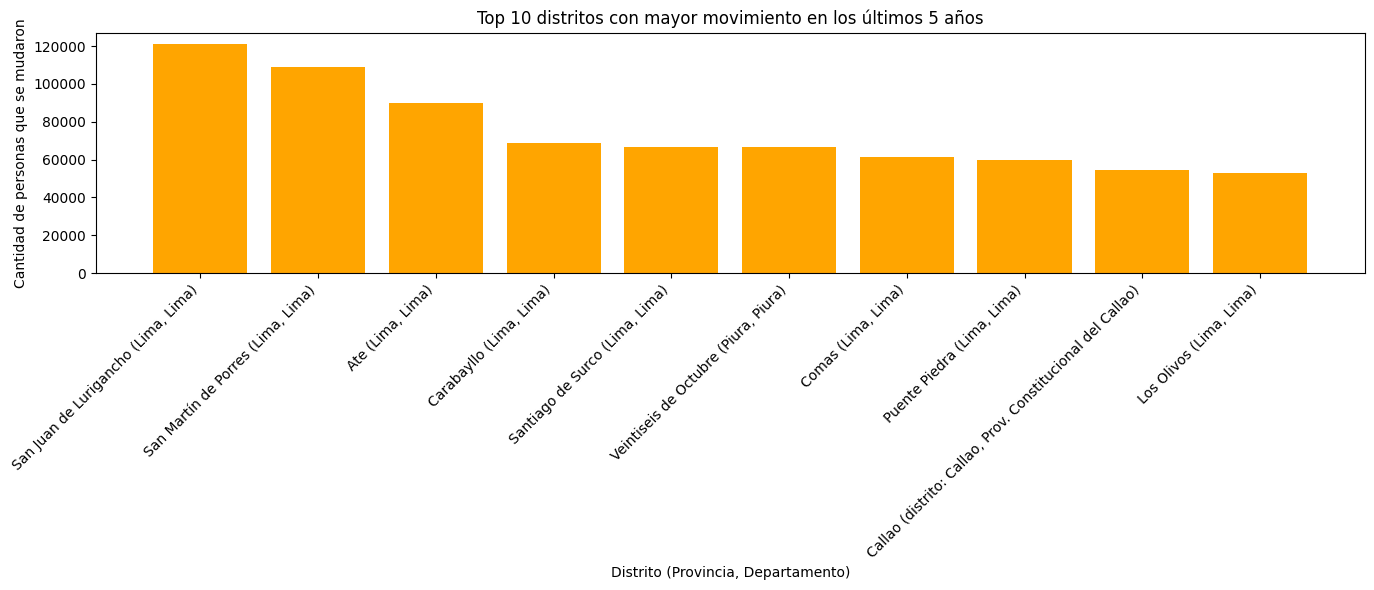

In [9]:
# Calcular la cantidad de personas que se mudaron a cada distrito
df['Movimiento'] = df['No vivía hace 5 años en este distrito']

# Crear una etiqueta combinada con distrito, provincia y departamento
df['Etiqueta'] = df['Distrito'] + ' (' + df['Provincia'] + ', ' + df['Departamento'] + ')'

# Obtener los 10 distritos con mayor movimiento
top10_mov = df.nlargest(10, 'Movimiento')

# Gráfico
plt.figure(figsize=(14, 6))
plt.bar(top10_mov['Etiqueta'], top10_mov['Movimiento'], color='orange')
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 distritos con mayor movimiento en los últimos 5 años')
plt.xlabel('Distrito (Provincia, Departamento)')
plt.ylabel('Cantidad de personas que se mudaron')
plt.tight_layout()
plt.show()

C:\Users\Benjamin\AppData\Local\Temp\ipykernel_22208\473612937.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mov_provincia.values, y=mov_provincia.index, palette="YlOrRd")


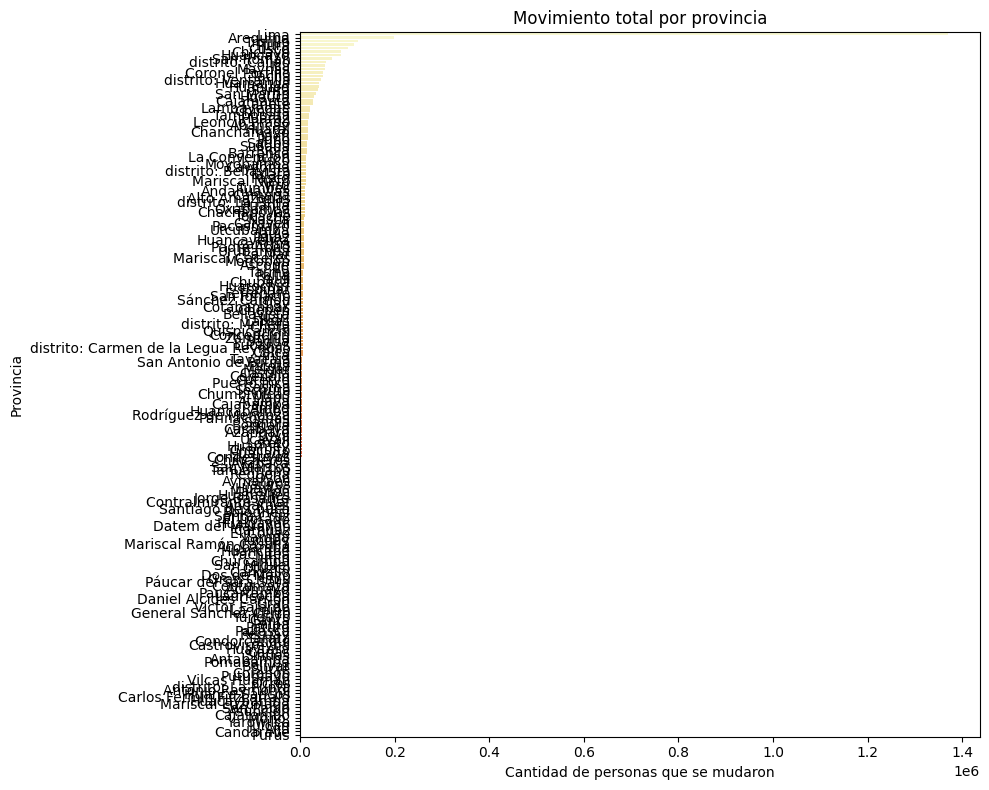

In [10]:
import seaborn as sns

# Sumar movimientos por provincia
mov_provincia = df.groupby('Provincia')['Movimiento'].sum().sort_values(ascending=False)

# Gráfico
plt.figure(figsize=(10, 8))
sns.barplot(x=mov_provincia.values, y=mov_provincia.index, palette="YlOrRd")
plt.title('Movimiento total por provincia')
plt.xlabel('Cantidad de personas que se mudaron')
plt.ylabel('Provincia')
plt.tight_layout()
plt.show()


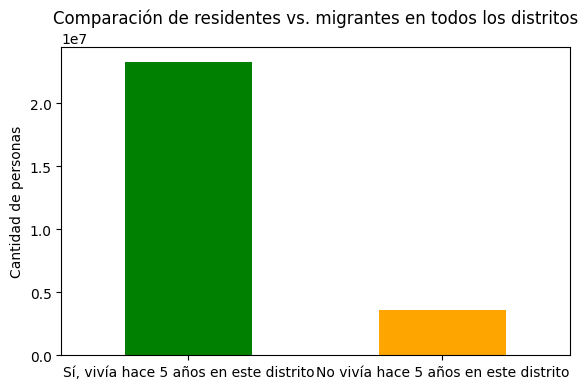

In [11]:
# Sumar datos
totales = df[['Sí, vivía hace 5 años en este distrito', 'No vivía hace 5 años en este distrito']].sum()

# Gráfico
plt.figure(figsize=(6,4))
totales.plot(kind='bar', color=['green', 'orange'])
plt.title('Comparación de residentes vs. migrantes en todos los distritos')
plt.ylabel('Cantidad de personas')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


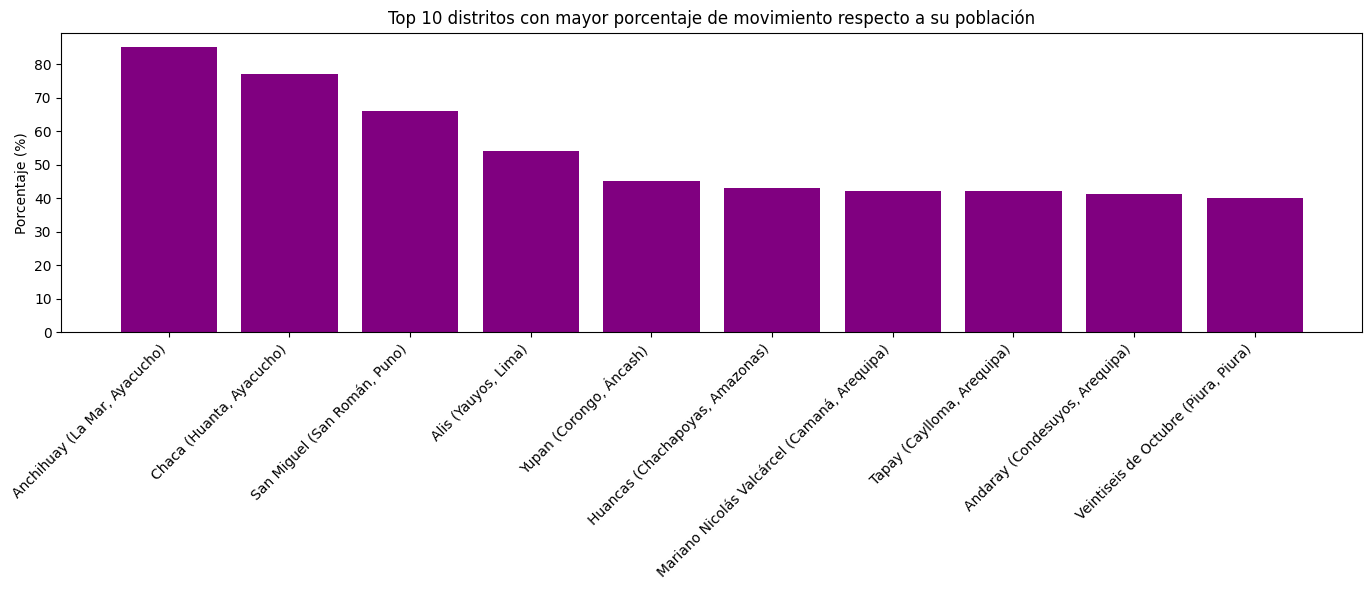

In [ ]:
# Crear columna de porcentaje de movimiento
df['Porcentaje Movimiento'] = df['Movimiento'] / (df[['Aún no había nacido', 'Sí, vivía hace 5 años en este distrito', 'Movimiento']].sum(axis=1)) * 100

# Top 10 distritos con mayor % de movimiento
top10_pct = df.nlargest(10, 'Porcentaje Movimiento')

# Gráfico
plt.figure(figsize=(14, 6))
plt.bar(top10_pct['Etiqueta'], top10_pct['Porcentaje Movimiento'], color='purple')
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 distritos con mayor porcentaje de movimiento respecto a su población')
plt.ylabel('Porcentaje (%)')
plt.tight_layout()
plt.show()


In [ ]:
 
# Cargar datasets
movimiento = df
ubigeo = pd.read_csv("../Transform_movimientos/Ubigeo.csv")
# Revisar nombres de columnas para saber con qué columna unir

print(movimiento.columns)
print(ubigeo.columns)

# cambiadno columna codigo de movimiento a ubigeo_inei

movimiento.rename(columns={"Código":"ubigeo_inei"})



Index(['Código', 'Departamento', 'Provincia', 'Distrito',
       'Aún no había nacido', 'Sí, vivía hace 5 años en este distrito',
       'No vivía hace 5 años en este distrito'],
      dtype='object')
Index(['Unnamed: 0', 'id_ubigeo', 'ubigeo_reniec', 'ubigeo_inei',
       'departamento_inei', 'departamento', 'provincia_inei', 'provincia',
       'distrito', 'region', 'macroregion_inei', 'macroregion_minsa',
       'iso_3166_2', 'fips', 'superficie', 'altitud', 'latitud', 'longitud',
       'Frontera'],
      dtype='object')


In [21]:
# cambiadno columna codigo de movimiento a ubigeo_inei

movimiento=movimiento.rename(columns={"Código":"ubigeo_inei"})

In [23]:
# Unir los dos datasets
df_final = pd.merge(movimiento, ubigeo, on='ubigeo_inei', how='left')


In [36]:
df_final.head()

,ubigeo_inei,Departamento,Provincia,Distrito,Aún no había nacido,"Sí, vivía hace 5 años en este distrito",No vivía hace 5 años en este distrito,superficie,altitud,latitud,longitud,Frontera
0,10101,Amazonas,Chachapoyas,Chachapoyas,2633,22774,7182,154.0,2338.0,-6.2294,-77.8728,NO
1,10102,Amazonas,Chachapoyas,Asunción,22,220,20,26.0,2823.0,-6.0325,-77.7108,NO
2,10103,Amazonas,Chachapoyas,Balsas,111,938,87,357.0,859.0,-6.8358,-78.0197,NO
3,10104,Amazonas,Chachapoyas,Cheto,44,533,65,57.0,2143.0,-6.2556,-77.7008,NO
4,10105,Amazonas,Chachapoyas,Chiliquin,49,483,53,143.0,2677.0,-6.0783,-77.7375,NO


In [30]:
df_final.columns

Index(['ubigeo_inei', 'Departamento', 'Provincia', 'Distrito',
       'Aún no había nacido', 'Sí, vivía hace 5 años en este distrito',
       'No vivía hace 5 años en este distrito', 'superficie', 'altitud',
       'latitud', 'longitud', 'Frontera'],
      dtype='object')

In [29]:
#eliminando columnas innecesarias
df_final=df_final.drop(["Unnamed: 0","id_ubigeo","ubigeo_reniec","departamento_inei","departamento","provincia_inei","provincia","distrito","region","macroregion_inei","macroregion_minsa","iso_3166_2","fips"], axis=1)

In [50]:
# Asumiendo que df_rangos es una Serie
df_rangos = df_final["No vivía hace 5 años en este distrito"]

# Ordenar la Serie de menor a mayor
df_rangos_sorted = df_rangos.sort_values()

# Calcular los percentiles 33 y 66
percentil_33 = df_rangos_sorted.quantile(0.33)
percentil_66 = df_rangos_sorted.quantile(0.66)

print(f"Percentil 33: {percentil_33}")
print(f"Percentil 66: {percentil_66}")

Percentil 33: 97.75999999999999
Percentil 66: 407.55999999999995


In [52]:


# Crear el mapa base centrado en una ubicación en Perú (puedes ajustar según tus datos)
mapa = folium.Map(location=[-9.19, -75.0152], zoom_start=6)  # Coordenadas de Perú, puedes centrarlas en otro lugar

# Definir una función para asignar colores en función del número de personas que vivían hace 5 años
def get_color(cantidad):
    if cantidad > percentil_66:
        return 'green'  # Muchas personas
    elif cantidad > percentil_33:
        return 'orange'  # Personas medianas
    else:
        return 'red'  # Pocas personas

# Iterar sobre las filas del dataframe para agregar marcadores y colorear según la cantidad de personas
for index, row in df_final.iterrows():
    lat = row['latitud']
    lon = row['longitud']
    cantidad = row['No vivía hace 5 años en este distrito']  # Suponiendo que esta columna es la que contiene la cantidad

    # Obtener color según la cantidad de personas
    color = get_color(cantidad)

    # Agregar marcador en el mapa con popup que muestra información adicional
    folium.CircleMarker(
        location=[lat, lon],
        radius=8,
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.7,
        popup=f"Distrito: {row['Distrito']}<br>Departamento: {row['Departamento']}<br>Provincia: {row['Provincia']}<br>Cantidad de personas entrantes: {cantidad}"
    ).add_to(mapa)

# Guardar el mapa como un archivo HTML
mapa.save('mapa_distritos_peru.html')

# Para mostrar el mapa directamente en Jupyter Notebook, simplemente escribe 'mapa'
mapa
